# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

### The busiess task is to identify which are the factors consumer is interested in buying( attributes makes the price expensive or cheaper) This will help seller to focus on key attributes that consumer is interested in buying a car

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

### Dataset (vehicle.csv) consists of 18 features and 426880 rows.
    price - Target Value
    year  - vehicle year ( Ranging from 1931 to 2018)
    odometer - odometer reading
    region - cities or region where car is sold
    manufacturer - vehicle manufacurer ( make )
    model - model of car 
    condition - ( new /like new/fair/good/excellent etc)
    cylinders - cylinders of car ( ranging from 4 to 12)
    fuel  - gas/hybrid/diesel/electric and also noticed other is also present
    title_status - whether parts are missing/lien or clean or salvgage etc. we will find out whether this is important
                   feature or not that customer is interested
    VIN  - vin number - this should not be key attribute determining price. this can be dropped
    drive - whether 4 wheel drive etc.
    size - full size or compact or mid-size
    paint_color - color of car. this could be interesting and important feature that consumer is interested in
    state -  vehicle state - price might vary based on vehicle state

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [171]:
%matplotlib inline 
from sklearn.feature_selection import SequentialFeatureSelector, SelectFromModel,  RFE
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder, OrdinalEncoder
from sklearn.compose import make_column_transformer, make_column_selector, TransformedTargetRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, StratifiedShuffleSplit, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.inspection import permutation_importance
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
from sklearn import set_config
set_config(display="diagram")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import csv

#Importing and reading CSV file
df = pd.read_csv('data/vehicles.csv', encoding='latin-1', index_col=None)


In [172]:
df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

## find out what are the colunms having null

In [175]:
df.isnull().sum()

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

In [176]:
# dropping null 
df.dropna(inplace=True)

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34868 entries, 126 to 426836
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            34868 non-null  int64  
 1   region        34868 non-null  object 
 2   price         34868 non-null  int64  
 3   year          34868 non-null  float64
 4   manufacturer  34868 non-null  object 
 5   model         34868 non-null  object 
 6   condition     34868 non-null  object 
 7   cylinders     34868 non-null  object 
 8   fuel          34868 non-null  object 
 9   odometer      34868 non-null  float64
 10  title_status  34868 non-null  object 
 11  transmission  34868 non-null  object 
 12  VIN           34868 non-null  object 
 13  drive         34868 non-null  object 
 14  size          34868 non-null  object 
 15  type          34868 non-null  object 
 16  paint_color   34868 non-null  object 
 17  state         34868 non-null  object 
dtypes: float64(2), int64(2)

In [178]:
# check again no null values
df.isnull().sum()

id              0
region          0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
VIN             0
drive           0
size            0
type            0
paint_color     0
state           0
dtype: int64

In [179]:
df.head(10)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
126,7305672709,auburn,0,2018.0,chevrolet,express cargo van,like new,6 cylinders,gas,68472.0,clean,automatic,1GCWGAFP8J1309579,rwd,full-size,van,white,al
127,7305672266,auburn,0,2019.0,chevrolet,express cargo van,like new,6 cylinders,gas,69125.0,clean,automatic,1GCWGAFP4K1214373,rwd,full-size,van,white,al
128,7305672252,auburn,0,2018.0,chevrolet,express cargo van,like new,6 cylinders,gas,66555.0,clean,automatic,1GCWGAFPXJ1337903,rwd,full-size,van,white,al
215,7316482063,birmingham,4000,2002.0,toyota,echo,excellent,4 cylinders,gas,155000.0,clean,automatic,JTDBT123520243495,fwd,compact,sedan,blue,al
219,7316429417,birmingham,2500,1995.0,bmw,525i,fair,6 cylinders,gas,110661.0,clean,automatic,WBAHD6322SGK86772,rwd,mid-size,sedan,white,al
268,7315946365,birmingham,9000,2008.0,mazda,miata mx-5,excellent,4 cylinders,gas,56700.0,clean,automatic,JM1NC25F570128735,rwd,compact,convertible,white,al
337,7315354216,birmingham,8950,2011.0,ford,f-150,excellent,6 cylinders,gas,164000.0,clean,automatic,1FTMF1CM6BKD55331,fwd,full-size,truck,white,al
338,7315349921,birmingham,4000,1972.0,mercedes-benz,benz,fair,6 cylinders,gas,88100.0,clean,automatic,1.14023E+13,rwd,full-size,coupe,silver,al
346,7315259946,birmingham,98900,2001.0,ferrari,360 modena,good,8 cylinders,gas,20187.0,clean,automatic,ZFFYT53A110125703,rwd,mid-size,convertible,red,al
355,7315110575,birmingham,9400,2008.0,mercedes-benz,benz c350,good,6 cylinders,gas,129473.0,clean,automatic,WDDGF56X68F140907,rwd,full-size,sedan,silver,al


In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34868 entries, 126 to 426836
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            34868 non-null  int64  
 1   region        34868 non-null  object 
 2   price         34868 non-null  int64  
 3   year          34868 non-null  float64
 4   manufacturer  34868 non-null  object 
 5   model         34868 non-null  object 
 6   condition     34868 non-null  object 
 7   cylinders     34868 non-null  object 
 8   fuel          34868 non-null  object 
 9   odometer      34868 non-null  float64
 10  title_status  34868 non-null  object 
 11  transmission  34868 non-null  object 
 12  VIN           34868 non-null  object 
 13  drive         34868 non-null  object 
 14  size          34868 non-null  object 
 15  type          34868 non-null  object 
 16  paint_color   34868 non-null  object 
 17  state         34868 non-null  object 
dtypes: float64(2), int64(2)

In [181]:
df['fuel'].unique()

array(['gas', 'hybrid', 'diesel', 'other', 'electric'], dtype=object)

In [120]:
df['cylinders'].unique()

array(['6 cylinders', '4 cylinders', '8 cylinders', '5 cylinders',
       '10 cylinders', '3 cylinders', 'other', '12 cylinders'],
      dtype=object)

In [182]:
df['type'].unique()

array(['van', 'sedan', 'convertible', 'truck', 'coupe', 'SUV',
       'hatchback', 'wagon', 'pickup', 'other', 'mini-van', 'offroad',
       'bus'], dtype=object)

In [183]:
df['transmission'].unique()

array(['automatic', 'manual', 'other'], dtype=object)

In [184]:
### all of above have other in several variables . so renaming those
df['fuel'] = df['fuel'].replace({'other': 'other_fuel'})
df['cylinders'] = df['cylinders'].replace({'other': 'other_cylinders'})
df['type'] = df['type'].replace({'other': 'other_type'})
df['transmission'] = df['transmission'].replace({'other': 'other_transmission'})

## visualization of features

[Text(0.5, 0, 'drive'), Text(0, 0.5, 'Count of Car Drive')]

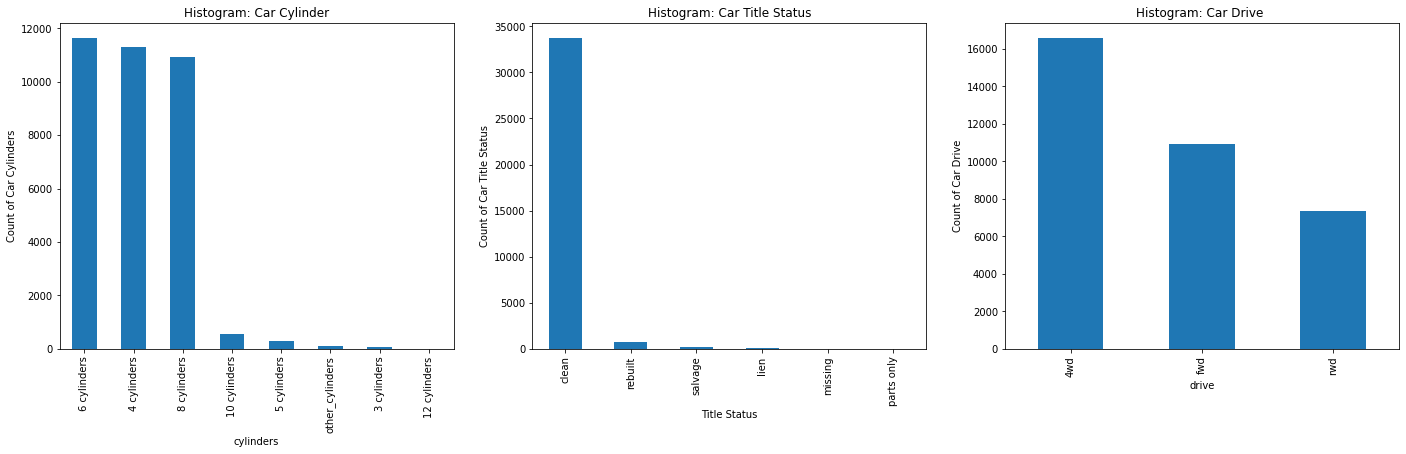

In [185]:
# visualization of features
plt.figure(figsize=(24, 6))
plt.subplot(1,3,1)
dfplt1 = df.cylinders.value_counts().plot(kind='bar')
plt.title('Histogram: Car Cylinder')
dfplt1.set(xlabel = 'cylinders', ylabel='Count of Car Cylinders')

plt.subplot(1,3,2)
dfplt1 = df.title_status.value_counts().plot(kind='bar')
plt.title('Histogram: Car Title Status')
dfplt1.set(xlabel = 'Title Status', ylabel='Count of Car Title Status')

plt.subplot(1,3,3)
dfplt1 = df.drive.value_counts().plot(kind='bar')
plt.title('Histogram: Car Drive ')
dfplt1.set(xlabel = 'drive', ylabel='Count of Car Drive')



[Text(0.5, 0, 'transmission'), Text(0, 0.5, 'Frequency of Car transmission')]

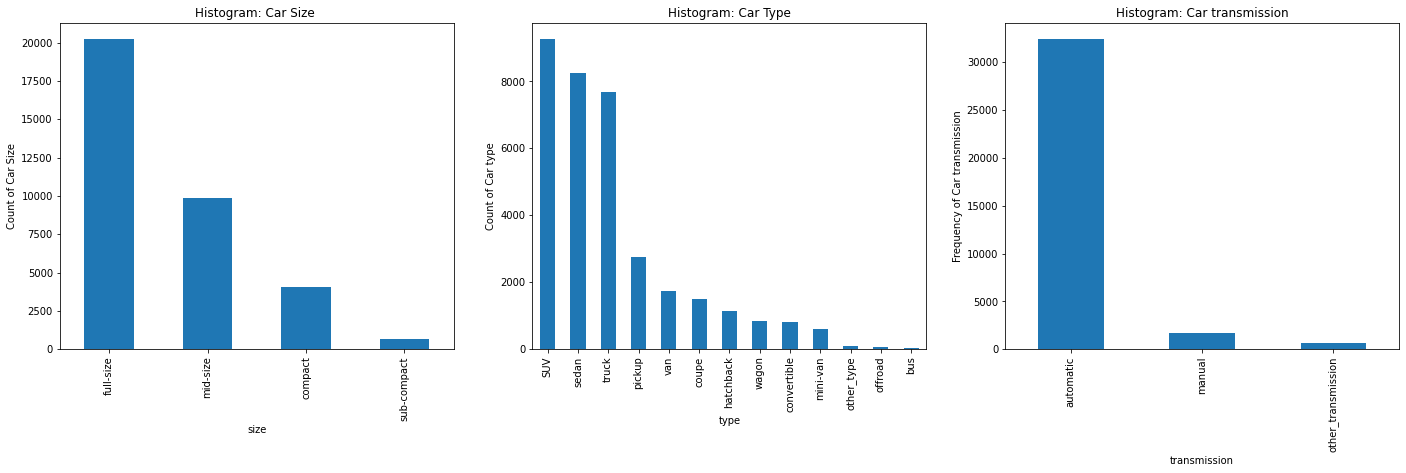

In [186]:
plt.figure(figsize=(24, 6))
plt.subplot(1,3,1)
dfplt1 = df['size'].value_counts().plot(kind='bar')
plt.title('Histogram: Car Size ')
dfplt1.set(xlabel = 'size', ylabel='Count of Car Size')

plt.subplot(1,3,2)
dfplt1 = df.type.value_counts().plot(kind='bar')
plt.title('Histogram: Car Type')
dfplt1.set(xlabel = 'type', ylabel='Count of Car type')

plt.subplot(1,3,3)
dfplt1 = df.transmission.value_counts().plot(kind='bar')
plt.title('Histogram: Car transmission')
dfplt1.set(xlabel = 'transmission', ylabel='Frequency of Car transmission')

[Text(0.5, 0, 'paint_color'), Text(0, 0.5, 'Count of  Paint Color')]

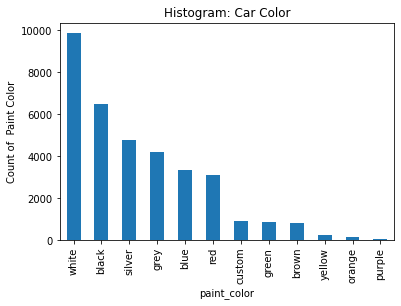

In [187]:
plt.figure(figsize=(6, 4))

plt.subplot(1,1,1)
plt1 = df.paint_color.value_counts().plot(kind='bar')
plt.title('Histogram: Car Color')
plt1.set(xlabel = 'paint_color', ylabel='Count of  Paint Color')

## identify and treat the outliers

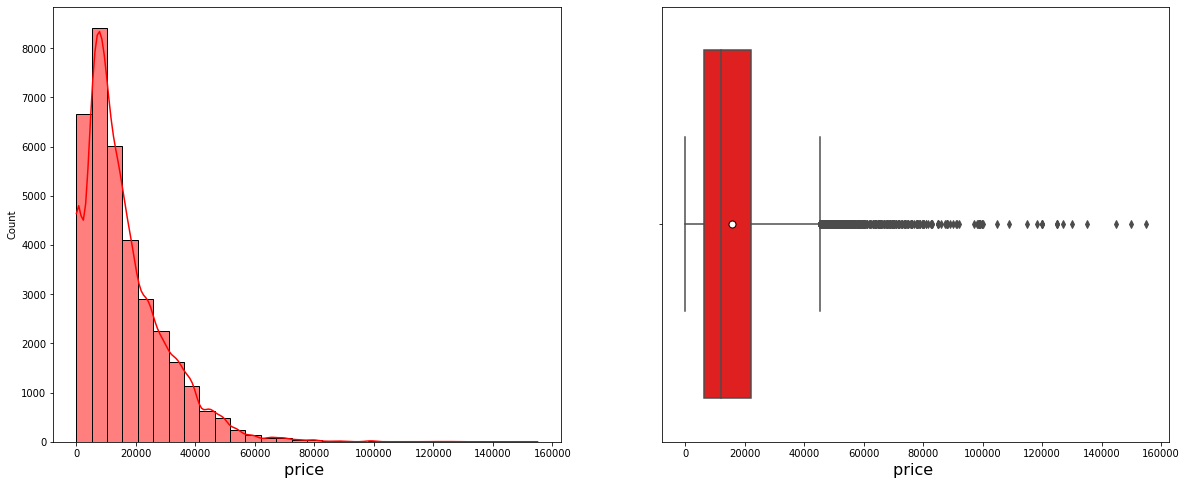

In [188]:
# price
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,8))
ax=sns.histplot(data=df, x="price",kde=True, color="red",bins=30, ax=axes[0])
ax.set_xlabel('price ',fontsize=16)
ax = sns.boxplot(x=df["price"],showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"7"},ax=axes[1], color="red")
ax.set_xlabel('price ',fontsize=16)
plt.show()

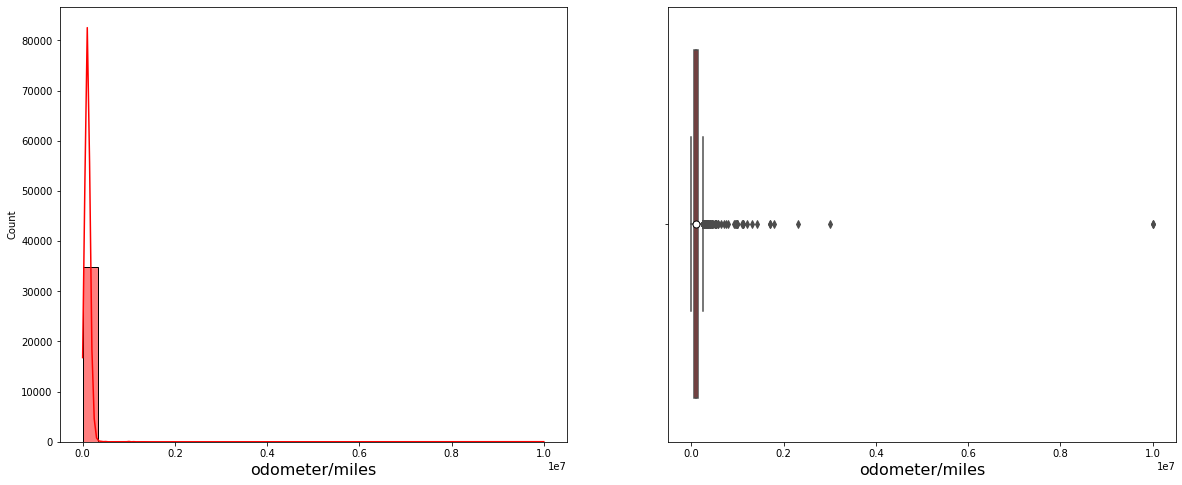

In [189]:
# odometer
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,8))
ax=sns.histplot(data=df, x="odometer",kde=True, color="red",bins=30, ax=axes[0])
ax.set_xlabel('odometer/miles',fontsize=16)
ax = sns.boxplot(x=df["odometer"],showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"7"},ax=axes[1], color="red")
ax.set_xlabel('odometer/miles',fontsize=16)
plt.show()

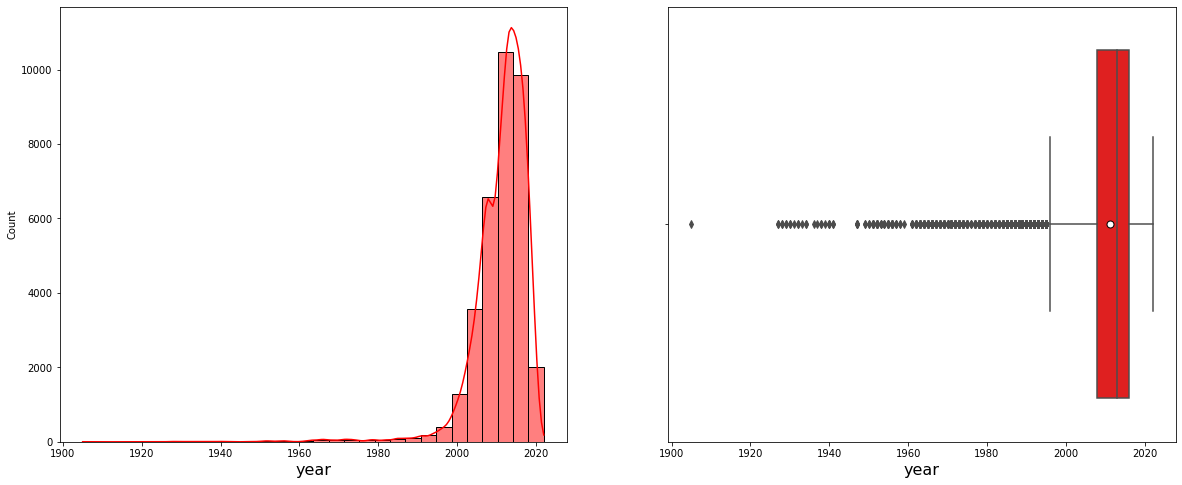

In [190]:
# year
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,8))
ax=sns.histplot(data=df, x="year",kde=True, color="red",bins=30, ax=axes[0])
ax.set_xlabel('year',fontsize=16)
ax = sns.boxplot(x=df["year"],showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"7"},ax=axes[1], color="red")
ax.set_xlabel('year',fontsize=16)
plt.show()

In [191]:
#identify the price with 0 o 1 and remove it
df.query('price==0 or price==1')

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
126,7305672709,auburn,0,2018.0,chevrolet,express cargo van,like new,6 cylinders,gas,68472.0,clean,automatic,1GCWGAFP8J1309579,rwd,full-size,van,white,al
127,7305672266,auburn,0,2019.0,chevrolet,express cargo van,like new,6 cylinders,gas,69125.0,clean,automatic,1GCWGAFP4K1214373,rwd,full-size,van,white,al
128,7305672252,auburn,0,2018.0,chevrolet,express cargo van,like new,6 cylinders,gas,66555.0,clean,automatic,1GCWGAFPXJ1337903,rwd,full-size,van,white,al
2062,7305672261,dothan,0,2018.0,chevrolet,express cargo van,like new,6 cylinders,gas,68472.0,clean,automatic,1GCWGAFP8J1309579,rwd,full-size,van,white,al
2063,7305672264,dothan,0,2019.0,chevrolet,express cargo van,like new,6 cylinders,gas,69125.0,clean,automatic,1GCWGAFP4K1214373,rwd,full-size,van,white,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417975,7302282339,green bay,0,2018.0,ram,2500,excellent,6 cylinders,diesel,20492.0,clean,automatic,3C6UR5HL3JG307217,4wd,full-size,truck,white,wi
424334,7309978253,milwaukee,0,2016.0,toyota,4runner trd pro,excellent,6 cylinders,gas,45286.0,clean,automatic,JTEBU5JR5G5317191,4wd,full-size,SUV,brown,wi
425403,7309950295,sheboygan,0,2013.0,gmc,acadia,excellent,6 cylinders,gas,152207.0,clean,automatic,1GKKVPKD0DJ141304,4wd,full-size,SUV,red,wi
426539,7309961831,wyoming,0,2016.0,toyota,4runner trd pro,excellent,6 cylinders,gas,45286.0,clean,automatic,JTEBU5JR5G5317191,4wd,full-size,SUV,brown,wy


In [192]:
df=df.query('price!=0 and price!=1')

In [193]:
#remove outliers using DBScan
features=["price","odometer","year"]

In [194]:
def treatoutliers(data,variable):
    first_quartile=data[variable].quantile(0.25)
    third_quartile=data[variable].quantile(0.75)
    iqr= third_quartile - first_quartile
    lower=first_quartile - 1.5*iqr
    lower=0 if lower<0 else lower
    upper=upper=third_quartile + 1.5*iqr
    0 if upper<0 else upper
    print(lower,upper)
    data=data[(data[variable] < upper) &  (data[variable] > lower)]
    return data

In [195]:
for feature in features:
    df=treatoutliers(df,feature)   

0 47825.0
0 254128.0
1997.5 2025.5


In [196]:
from sklearn.cluster import DBSCAN
def remove_outliers(df,variable,eps,min_samples):
    outlier_detection = DBSCAN(eps = eps, min_samples = min_samples)
    clusters = outlier_detection.fit_predict(df[variable].values.reshape(-1,1))
    data = pd.DataFrame()
    data['cluster'] = clusters
    return data['cluster'].values

In [197]:
for feature in features:
    clusters=np.unique(remove_outliers(df,feature,0.5,5)).tolist()
    for i in range(0,len(clusters)):
        df=df[df[feature]!=clusters[i]]

## verify the outliers again after removal

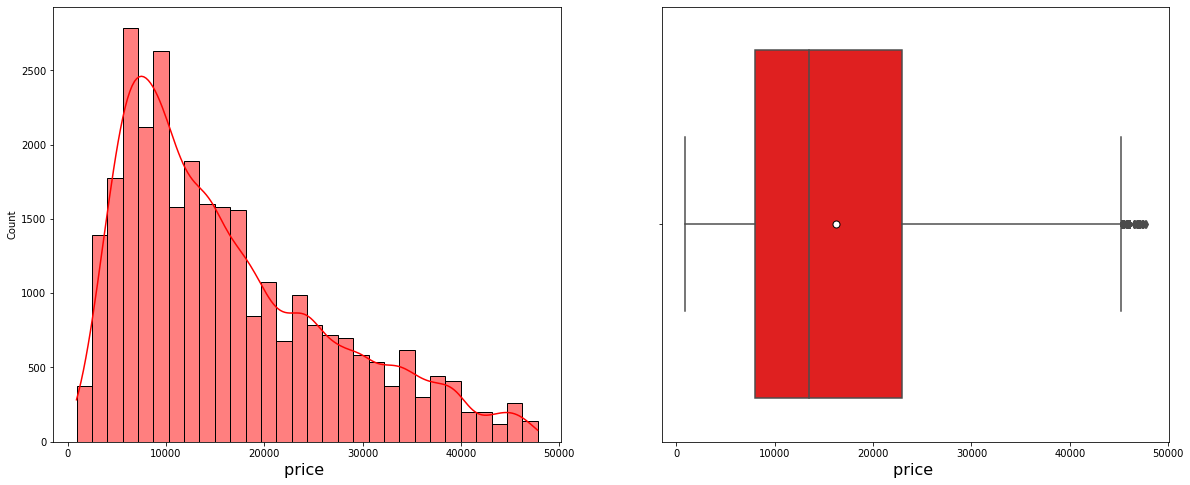

In [198]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,8))
ax=sns.histplot(data=df, x="price",kde=True, color="red",bins=30, ax=axes[0])
ax.set_xlabel('price ',fontsize=16)
ax = sns.boxplot(x=df["price"],showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"7"},ax=axes[1], color="red")
ax.set_xlabel('price ',fontsize=16)
plt.show()

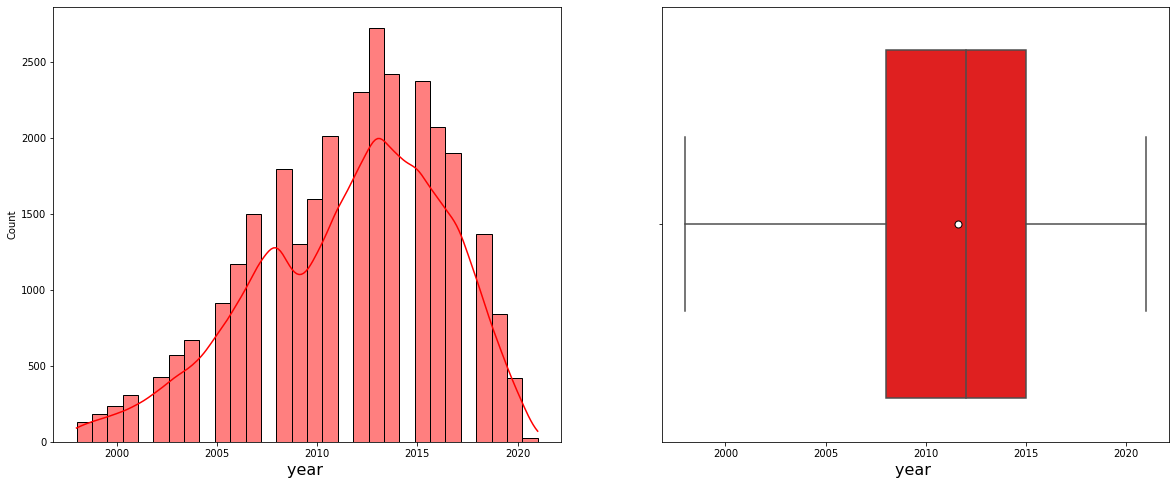

In [199]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,8))
ax=sns.histplot(data=df, x="year",kde=True, color="red",bins=30, ax=axes[0])
ax.set_xlabel('year ',fontsize=16)
ax = sns.boxplot(x=df["year"],showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"7"},ax=axes[1], color="red")
ax.set_xlabel('year ',fontsize=16)
plt.show()

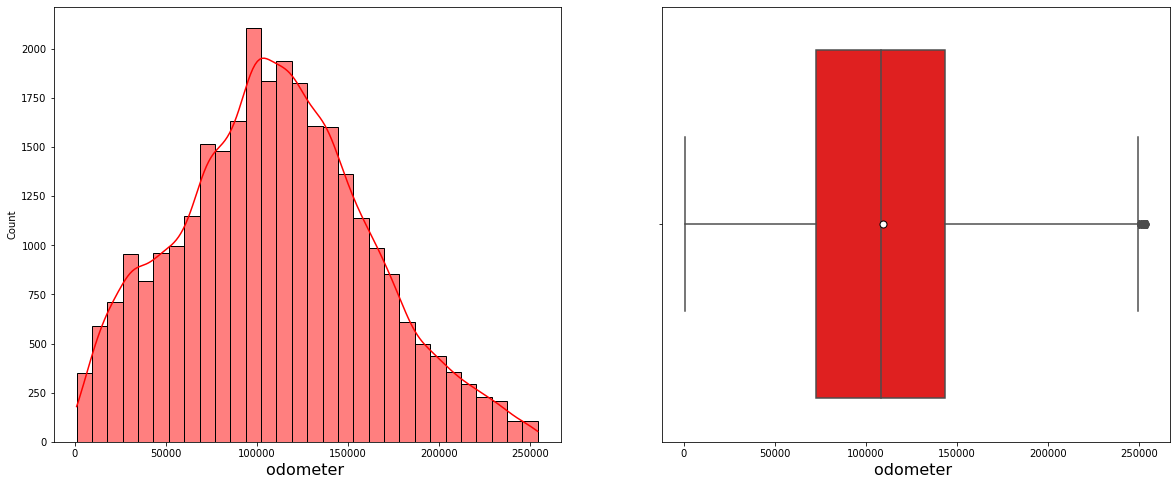

In [200]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,8))
ax=sns.histplot(data=df, x="odometer",kde=True, color="red",bins=30, ax=axes[0])
ax.set_xlabel('odometer ',fontsize=16)
ax = sns.boxplot(x=df["odometer"],showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"7"},ax=axes[1], color="red")
ax.set_xlabel('odometer ',fontsize=16)
plt.show()

### visualization of key independent/dependent features

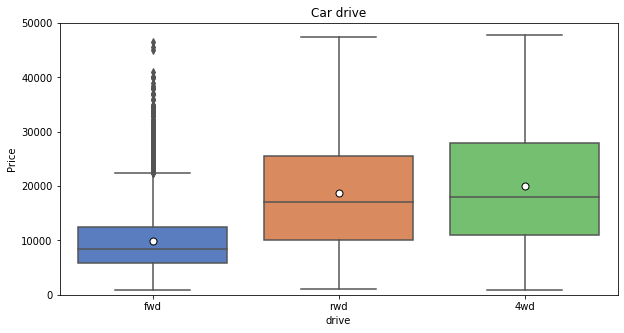

In [201]:
plt.figure(figsize=(10,5))
plt.ylim(0,50000)
sns.boxplot(x=df.drive, y=df.price, palette=("muted"),showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"7"})
plt.title("Car drive")
# Set x-axis label
plt.xlabel('drive')
plt.ylabel('Price')
plt.show()

### observation:  most expensive cars are 4 wheel drive

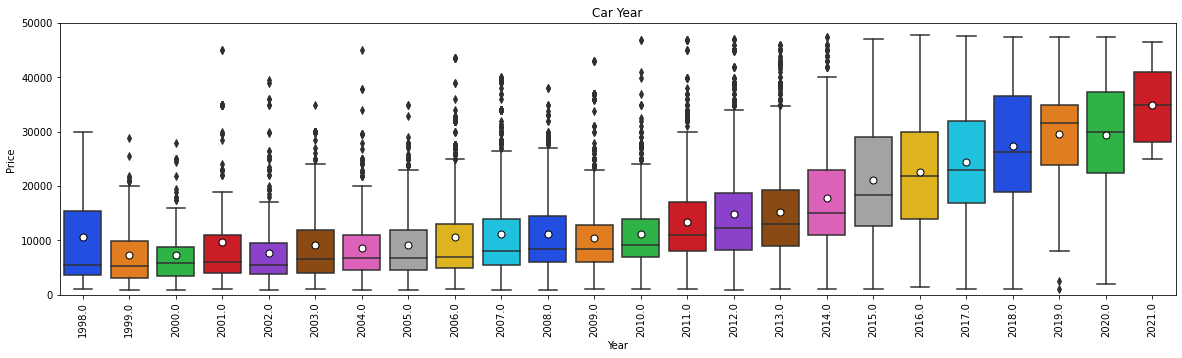

In [202]:
plt.figure(figsize=(20,5))
plt.ylim(0,50000)
sns.boxplot(x=df.year, y=df.price, palette=("bright"),showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"7"})
plt.title("Car Year")
plt.xlabel('Year')
plt.xticks(rotation = 90)
plt.ylabel('Price ')
plt.show()


### observation:  as year increas price increases. it is identified as positive correlation between year and price

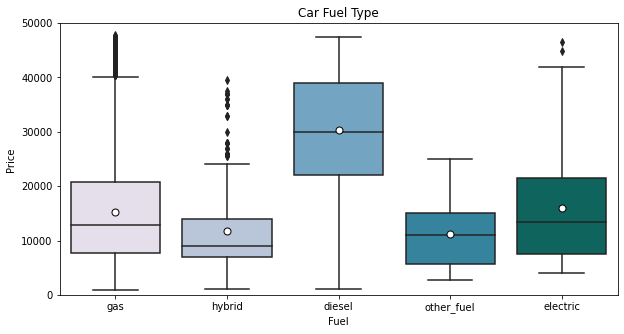

In [203]:
plt.figure(figsize=(10,5))
plt.ylim(0,50000)
sns.boxplot(x=df.fuel, y=df.price, palette=("PuBuGn"),showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"7"})
plt.title("Car Fuel Type")
plt.xlabel('Fuel')
plt.ylabel('Price ')
plt.show()

### observation:  diesel/fuel is more expensive than other types and hybrid are cheaper

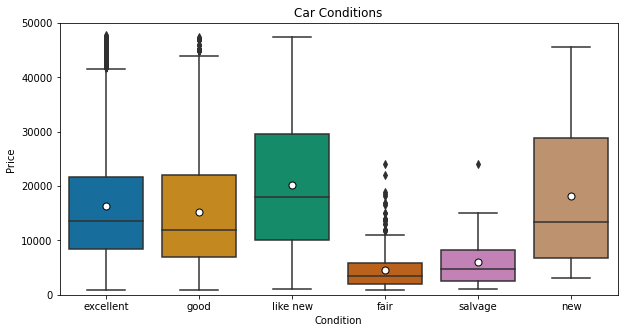

In [204]:
plt.figure(figsize=(10,5))
plt.ylim(0,50000)
sns.boxplot(x=df.condition, y=df.price, palette=("colorblind"),showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"7"})
plt.title("Car Conditions")
plt.xlabel('Condition')
plt.ylabel('Price ')
plt.show()

### observation:  most expensive ones are new and like new car and cheaper ones are fair

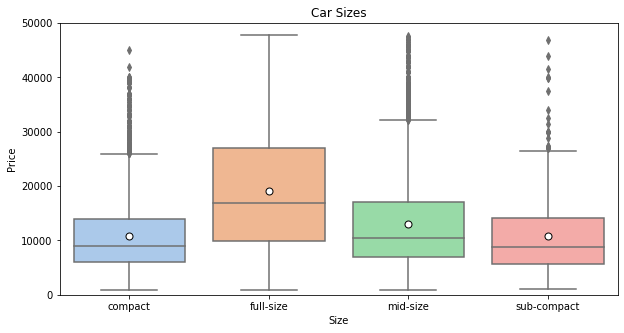

In [205]:
plt.figure(figsize=(10,5))
plt.ylim(0,50000)
sns.boxplot(x=df['size'], y=df.price, palette=("pastel"),showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"7"})
plt.title("Car Sizes")
plt.xlabel('Size')
plt.ylabel('Price')
plt.show()

### observation:  most expensive ones are full size car amd compact are cheaper

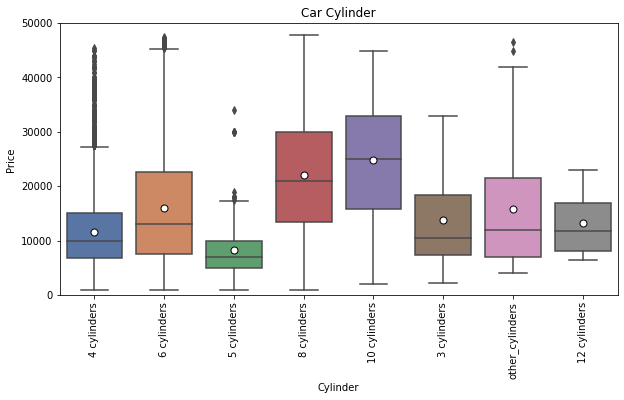

In [206]:
plt.figure(figsize=(10,5))
plt.ylim(0,50000)
sns.boxplot(x=df.cylinders, y=df.price, palette=("deep"),showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"7"})
plt.title("Car Cylinder")
plt.xlabel('Cylinder')
plt.xticks(rotation = 90)
plt.ylabel('Price ')
plt.show()

### observation:  most expensive ones are with 10 cyclinders and cheaper ones are with 5 cyclinders not the 4

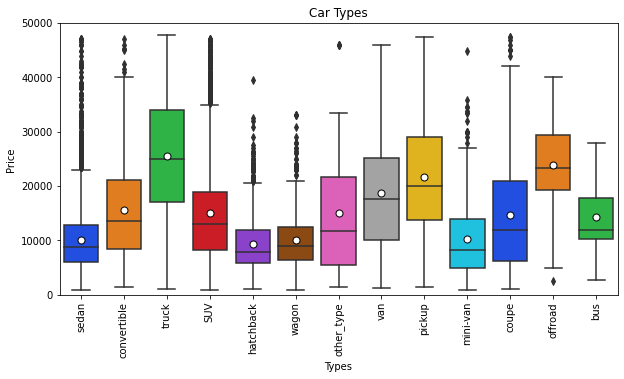

In [207]:
plt.figure(figsize=(10,5))
plt.ylim(0,50000)
sns.boxplot(x=df.type, y=df.price, palette=("bright"),showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"7"})
plt.title("Car Types")
plt.xlabel('Types')
plt.xticks(rotation = 90)
plt.ylabel('Price ')
plt.show()

### observation:  most expensive ones are truck  ( Expensive than Bus.) on the cheaper side sedan and hatchback cars shows same

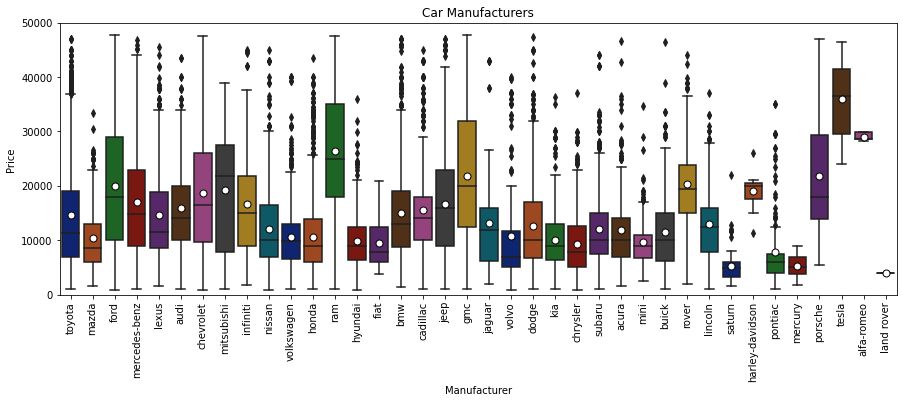

In [208]:
plt.figure(figsize=(15,5))
plt.ylim(0,50000)
sns.boxplot(x=df.manufacturer, y=df.price, palette=("dark"),showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"7"})
plt.title("Car Manufacturers")
plt.xlabel('Manufacturer')
plt.xticks(rotation = 90)
plt.ylabel('Price ')
plt.show()

### observation:  most expensive ones tesla as expected and cheaper ones are saturn

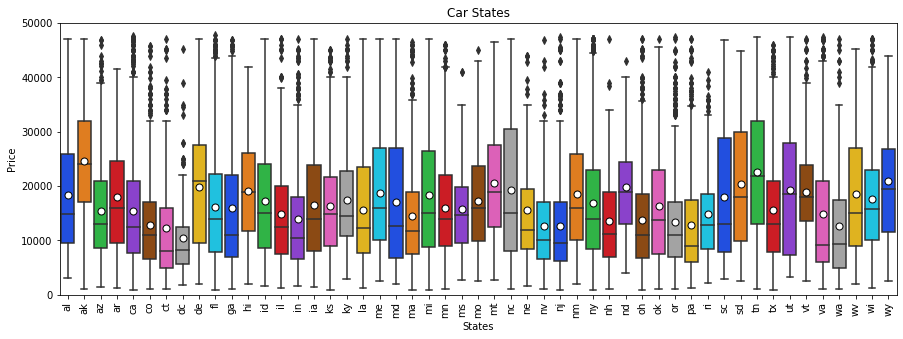

In [209]:
plt.figure(figsize=(15,5))
plt.ylim(0,50000)
sns.boxplot(x=df.state, y=df.price, palette=("bright"),showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"7"})
plt.title("Car States")
plt.xlabel('States')
plt.xticks(rotation = 90)
plt.ylabel('Price')
plt.show()

### observation:  cheaper used cars are available in DC,Arkansas,South Dakota

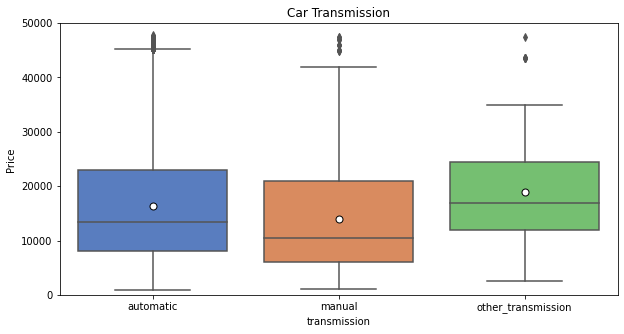

In [210]:
plt.figure(figsize=(10,5))
plt.ylim(0,50000)
sns.boxplot(x=df.transmission, y=df.price, palette=("muted"),showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"7"})
plt.title("Car Transmission")
plt.xlabel('transmission')
plt.ylabel('Price ')
plt.show()

### observation:  not much difference on transmission across all

### categorical features Analysis and encoding

In [211]:
#encoding categorical features
fuel_encoded=pd.get_dummies(df['fuel'])
cylinders_encoded=pd.get_dummies(df['cylinders'])
type_encoded=pd.get_dummies(df['type'])
transmission_encoded=pd.get_dummies(df['transmission'])
manufacturer_encoded=pd.get_dummies(df['manufacturer'])
state_encoded=pd.get_dummies(df['state'])
size_encoded=pd.get_dummies(df['size'])
paint_color_encoded=pd.get_dummies(df['paint_color'])
title_status_encoded=pd.get_dummies(df['title_status'])
drive_encoded=pd.get_dummies(df['drive'])
df1=pd.concat([df,fuel_encoded,cylinders_encoded,type_encoded,transmission_encoded,manufacturer_encoded,state_encoded,
               size_encoded,paint_color_encoded,title_status_encoded,drive_encoded],axis=1)

In [212]:
df1.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,...,yellow,clean,lien,missing,parts only,rebuilt,salvage,4wd,fwd,rwd
215,7316482063,birmingham,4000,2002.0,toyota,echo,excellent,4 cylinders,gas,155000.0,...,0,1,0,0,0,0,0,0,1,0
268,7315946365,birmingham,9000,2008.0,mazda,miata mx-5,excellent,4 cylinders,gas,56700.0,...,0,1,0,0,0,0,0,0,0,1
337,7315354216,birmingham,8950,2011.0,ford,f-150,excellent,6 cylinders,gas,164000.0,...,0,1,0,0,0,0,0,0,1,0
355,7315110575,birmingham,9400,2008.0,mercedes-benz,benz c350,good,6 cylinders,gas,129473.0,...,0,1,0,0,0,0,0,0,0,1
364,7314967754,birmingham,7300,2007.0,lexus,rx350,good,6 cylinders,gas,181000.0,...,0,1,0,0,0,0,0,0,1,0


In [109]:
#ordinal features 
#The column "condition" is ordered values, so a numeric value representing the scale can be used


In [213]:
oe = OrdinalEncoder(categories = [['salvage', 'fair', 'good', 'excellent', 'like new','new']])
oe.fit_transform(df[['condition']])

array([[3.],
       [3.],
       [3.],
       ...,
       [4.],
       [3.],
       [3.]])

In [214]:
ordinal_ohe_transformer = make_column_transformer((OrdinalEncoder(categories = [['salvage', 'fair', 'good', 'excellent', 'like new','new']]), ['condition']),
                                          remainder='passthrough')

In [215]:
df1['price']=df1['price'].div(10000)

In [216]:
df1['price'].describe()

count    29250.000000
mean         1.625994
std          1.056969
min          0.089500
25%          0.799000
50%          1.349900
75%          2.290000
max          4.779500
Name: price, dtype: float64

In [217]:
df1['odometer']=df1['odometer'].div(100000)

In [218]:
df1['odometer'].describe()

count    29250.000000
mean         1.093473
std          0.518049
min          0.009140
25%          0.728490
50%          1.085165
75%          1.435837
max          2.540610
Name: odometer, dtype: float64

In [219]:

df1['year']=df1['year'].div(1000)

In [220]:
df1['year'].describe()

count    29250.000000
mean         2.011582
std          0.004757
min          1.998000
25%          2.008000
50%          2.012000
75%          2.015000
max          2.021000
Name: year, dtype: float64

### Splitting the variables
### Splitting the dependent variable from the independent variables and assigning them to y and X respectively was done as follows:

In [221]:
X=df1.drop(['id','region','price','manufacturer','model','cylinders','fuel','type','transmission','state','size',
            'paint_color','drive','title_status','VIN'], axis = 1)
y = df1['price']

### Modeling

In [222]:
X_train, X_test, y_train, y_test =train_test_split( X, y, test_size=0.3, random_state=22)

### Since X has 145 column set we will try to reduce the number of columns using simple piple line model and use the 
permutations importance function. and keep the importance greather than 0

In [223]:
model = Pipeline([('transformer',ordinal_ohe_transformer),('scale', StandardScaler()), ('linear', LinearRegression())])
model.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(categories=[['salvage',
                                                                              'fair',
                                                                              'good',
                                                                              'excellent',
                                                                              'like '
                                                                              'new',
                                                                              'new']]),
                                                  ['condition'])])),
                ('scale', StandardScaler()), ('linear', LinearRegression())])

In [224]:
r = permutation_importance(model,X_test, y_test,n_repeats=30,random_state=0)    
perm=pd.DataFrame({"Column":X.columns, "Importance":r.importances_mean}).sort_values(by = "Importance", ascending = False)

In [226]:
perm.query('Importance>0.000').head(20)

,Column,Importance
29,automatic,1.798039e+23
30,manual,1.578303e+23
31,other_transmission,2.418313e+22
11,4 cylinders,1.910360e+22
13,6 cylinders,1.858296e+22
14,8 cylinders,1.707048e+22
16,SUV,1.514125e+22
25,sedan,1.434152e+22
26,truck,1.193921e+22
24,pickup,5.082696e+21


In [227]:
perm.query('Importance>0')['Column'].unique()

array(['automatic', 'manual', 'other_transmission', '4 cylinders',
       '6 cylinders', '8 cylinders', 'SUV', 'sedan', 'truck', 'pickup',
       'clean', 'van', 'gas', 'diesel', 'rebuilt', 'coupe', 'hatchback',
       'wagon', 'convertible', 'mini-van', 'white', '4wd', 'fwd',
       '5 cylinders', 'black', 'salvage', '10 cylinders', 'silver', 'rwd',
       'grey', 'ford', 'blue', 'hybrid', 'lien', 'red', 'chevrolet',
       'toyota', 'other_cylinders', 'honda', 'nissan', 'custom',
       'other_type', 'green', 'brown', '3 cylinders', 'offroad', 'jeep',
       'gmc', 'ram', 'bus', 'electric', 'subaru', 'dodge', 'hyundai',
       'bmw', 'volkswagen', 'mercedes-benz', 'kia', 'lexus', 'chrysler',
       'cadillac', 'mitsubishi', 'yellow', 'audi', 'buick', 'mazda',
       'other_fuel', 'volvo', 'infiniti', 'acura', 'lincoln', 'full-size',
       'orange', 'mini', 'mid-size', 'pontiac', 'rover', 'saturn',
       'porsche', '12 cylinders', 'compact', 'purple', 'mercury',
       'jaguar', 'fi

In [228]:
X1=X[['gas', 'diesel', 'automatic', 'manual', 'SUV', 'sedan', '4wd',
       'fwd', 'truck', 'hybrid', 'rwd', 'full-size', 'mid-size',
       'other_transmission', 'pickup', 'clean', 'van', 'rebuilt',
       'compact', 'coupe', 'hatchback', 'white', 'wagon', 'electric',
       'black', 'convertible', 'mini-van', 'silver', 'grey', 'salvage',
       'blue', 'red', 'lien', 'sub-compact', 'other_fuel', 'custom',
       'green', 'brown', 'other_type', 'offroad', 'bus', 'yellow',
       '4 cylinders', '6 cylinders', '8 cylinders', 'ford', 'chevrolet',
       'orange', 'toyota', 'honda', 'purple', 'nissan', 'jeep', 'gmc',
       'ram', 'subaru', 'dodge', 'hyundai', 'bmw', 'volkswagen',
       'mercedes-benz', 'kia', 'lexus', 'chrysler', 'cadillac',
       'mitsubishi', 'audi', 'buick', 'mazda', '5 cylinders', 'volvo',
       '10 cylinders', 'infiniti', 'acura', 'lincoln', 'mini', 'pontiac',
       'rover', 'saturn', 'porsche', 'mercury', 'other_cylinders',
       'jaguar', 'fiat', '3 cylinders', 'alfa-romeo', 'tesla',
       'harley-davidson', '12 cylinders', 'year', 'odometer', 'ny', 'nj',
       'oh', 'pa', 'vt', 'fl', 'condition', 'ma', 'wi', 'mn', 'ct', 'va',
       'co', 'tx', 'az', 'ia', 'dc', 'ks', 'ak', 'ri', 'mi', 'in', 'il',
       'ky', 'nh', 'ga', 'me', 'nv', 'wv', 'or', 'mt', 'la', 'al', 'md',
       'ar', 'ms', 'ok', 'mo', 'nd', 'ne', 'ut', 'hi', 'ca', 'nm', 'tn']]
y=df1['price']

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [229]:
selector_pipe = Pipeline([('transformer',ordinal_ohe_transformer),('scale', StandardScaler()),('targetregressor',TransformedTargetRegressor(func=np.log1p,inverse_func=np.expm1,regressor= Ridge()))])
selector_pipe

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(categories=[['salvage',
                                                                              'fair',
                                                                              'good',
                                                                              'excellent',
                                                                              'like '
                                                                              'new',
                                                                              'new']]),
                                                  ['condition'])])),
                ('scale', StandardScaler()),
                ('targetregressor',
                 TransformedTargetRegressor(func=<ufunc 'log1p'>,
                                            inverse_func=<ufunc 'expm1'>,
                                            regressor=Ridge()))])

In [230]:
model_param_dict={'targetregressor__regressor__alpha': [0.1, 1.0, 10.0, 100.0, 1000.0]}

In [231]:
cv = KFold(n_splits=5,random_state=None, shuffle=False)
model_grid = GridSearchCV(selector_pipe, param_grid=model_param_dict)
scores1 = cross_val_score(model_grid, X1,y,scoring='neg_mean_squared_error',cv=cv)

In [234]:
cv = KFold(n_splits=5,random_state=None, shuffle=False)
model_grid = GridSearchCV(selector_pipe, param_grid=model_param_dict)
scores2 = cross_val_score(model_grid, X1,y,scoring='r2',cv=cv)

In [235]:
print('K-Fold Cross Validation ‘neg_mean_squared_error scores: %s' % scores1)
print('K-Fold Cross Validation ‘neg_mean_squared_error: %.3f +/- %.3f' % (np.mean(scores1),np.std(scores1)))
print('K-Fold Cross Validation r^2 scores: %s' % scores2)
print('K-Fold Cross Validation R^2: %.3f +/- %.3f' % (np.mean(scores2),np.std(scores2)))

K-Fold Cross Validation ‘neg_mean_squared_error scores: [-0.22082817 -0.2259608  -0.20629457 -0.19602111 -0.20871716]
K-Fold Cross Validation ‘neg_mean_squared_error: -0.212 +/- 0.011
K-Fold Cross Validation r^2 scores: [0.79208419 0.791741   0.82771156 0.80179281 0.82569863]
K-Fold Cross Validation R^2: 0.808 +/- 0.016


In [236]:
X_train, X_test, y_train, y_test =train_test_split( X1, y, test_size=0.3, random_state=22)

In [237]:
model_grid = GridSearchCV(selector_pipe, param_grid=model_param_dict)
model_grid.fit(X_train, y_train)
model_train_preds = model_grid.predict(X_train)
model_test_preds = model_grid.predict(X_test)
model_train_mse = mean_squared_error(y_train,model_train_preds)
model_test_mse = mean_squared_error(y_test, model_test_preds)
print(f'Ridge Train MSE: {model_train_mse}')
print(f'Ridge Test MSE: {model_test_mse}')
print(f'Ridge R^2 Score::{r2_score(y_true=y_test, y_pred=model_test_preds)}')

Ridge Train MSE: 0.20460256202743562
Ridge Test MSE: 0.19593211503664568
Ridge R^2 Score::0.8249457260205145


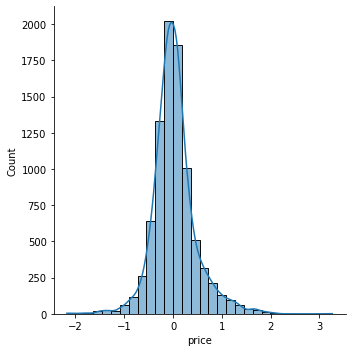

In [238]:
#histogram between validation and prediction
sns.displot(y_test-model_test_preds, bins=30, kde=True)

In [239]:
best_model=model_grid.best_estimator_

In [240]:
best_model['targetregressor'].regressor_.coef_

array([ 1.49655129e-02, -3.91523361e-02,  5.15287897e-02, -9.85683515e-03,
        9.09946161e-03, -1.76424939e-02, -4.79862593e-02,  2.85675114e-02,
       -3.38490825e-02,  5.74796013e-02, -1.38946333e-02,  4.55792692e-03,
        9.22171196e-03, -3.14468777e-03,  3.61313528e-03,  2.49417234e-02,
        8.67996850e-02,  2.85576161e-03,  5.35303133e-02, -8.26911511e-03,
        5.60390370e-03, -1.81975818e-02,  3.07720572e-03, -7.98337148e-03,
       -9.22885123e-03,  3.97252205e-03,  1.69282781e-02, -7.18679627e-03,
       -4.89941938e-03, -9.19565965e-04,  2.58314598e-02, -2.50062122e-03,
       -1.77627372e-03,  2.96464252e-02, -4.07395706e-03, -7.92651763e-03,
        1.15479606e-03,  5.92865120e-04, -2.67955078e-03, -6.00632847e-03,
        6.71028289e-03, -2.14149816e-03,  3.87649136e-03, -5.30201084e-02,
        8.78221395e-04,  5.27155798e-02,  1.09630745e-01,  9.98703253e-02,
        3.40023335e-03,  1.10390768e-01,  8.48943944e-02, -1.79130440e-03,
        4.88840984e-02,  

In [28]:
df1['state'].unique()


array(['al', 'ak', 'az', 'ar', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga',
       'hi', 'id', 'il', 'in', 'ia', 'ks', 'ky', 'la', 'me', 'md', 'ma',
       'mi', 'mn', 'ms', 'mo', 'mt', 'nc', 'ne', 'nv', 'nj', 'nm', 'ny',
       'nh', 'nd', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx',
       'ut', 'vt', 'va', 'wa', 'wv', 'wi', 'wy'], dtype=object)

In [241]:
coef=pd.DataFrame(best_model['targetregressor'].regressor_.coef_,columns=['coef_best_model'],index=['gas', 'diesel', 'automatic', 'manual', 'SUV', 'sedan', '4wd',
       'fwd', 'truck', 'hybrid', 'rwd', 'full-size', 'mid-size',
       'other_transmission', 'pickup', 'clean', 'van', 'rebuilt',
       'compact', 'coupe', 'hatchback', 'white', 'wagon', 'electric',
       'black', 'convertible', 'mini-van', 'silver', 'grey', 'salvage',
       'blue', 'red', 'lien', 'sub-compact', 'other_fuel', 'custom',
       'green', 'brown', 'other_type', 'offroad', 'bus', 'yellow',
       '4 cylinders', '6 cylinders', '8 cylinders', 'ford', 'chevrolet',
       'orange', 'toyota', 'honda', 'purple', 'nissan', 'jeep', 'gmc',
       'ram', 'subaru', 'dodge', 'hyundai', 'bmw', 'volkswagen',
       'mercedes-benz', 'kia', 'lexus', 'chrysler', 'cadillac',
       'mitsubishi', 'audi', 'buick', 'mazda', '5 cylinders', 'volvo',
       '10 cylinders', 'infiniti', 'acura', 'lincoln', 'mini', 'pontiac',
       'rover', 'saturn', 'porsche', 'mercury', 'other_cylinders',
       'jaguar', 'fiat', '3 cylinders', 'alfa-romeo', 'tesla',
       'harley-davidson', '12 cylinders', 'year', 'odometer', 'ny', 'nj',
       'oh', 'pa', 'vt', 'fl', 'condition', 'ma', 'wi', 'mn', 'ct', 'va',
       'co', 'tx', 'az', 'ia', 'dc', 'ks', 'ak', 'ri', 'mi', 'in', 'il',
       'ky', 'nh', 'ga', 'me', 'nv', 'wv', 'or', 'mt', 'la', 'al', 'md',
       'ar', 'ms', 'ok', 'mo', 'nd', 'ne', 'ut', 'hi', 'ca', 'nm', 'tn']).sort_values(by = "coef_best_model", ascending = False)

In [243]:
#Listing the 10 largest coeficients for the Ridge Regression Model
coef.query('coef_best_model>0').sort_values(by = "coef_best_model", ascending = False).head(10)

,coef_best_model
odometer,0.177017
honda,0.110391
chevrolet,0.109631
orange,0.099870
van,0.086800
purple,0.084894
gmc,0.060942
ram,0.059090
chrysler,0.057865
hybrid,0.057480


In [ ]:
#Listing the 10 largest coeficients affecting negatively the price of a used car for the Ridge Regression Model

In [244]:
coef.query('coef_best_model<0').sort_values(by = "coef_best_model", ascending = True).head(10)

,coef_best_model
ny,-0.125440
6 cylinders,-0.053020
4wd,-0.047986
diesel,-0.039152
truck,-0.033849
white,-0.018198
sedan,-0.017642
nj,-0.015471
pa,-0.013930
rwd,-0.013895


In [245]:
r2 = permutation_importance(model_grid,X_test, y_test,n_repeats=30)    
perm2=pd.DataFrame({"Column":X.columns, "Importance":r.importances_mean}).sort_values(by = "Importance", ascending = False)

In [246]:
perm2.query('Importance>0.000').head(10)

,Column,Importance
29,automatic,1.798039e+23
30,manual,1.578303e+23
31,other_transmission,2.418313e+22
11,4 cylinders,1.910360e+22
13,6 cylinders,1.858296e+22
14,8 cylinders,1.707048e+22
16,SUV,1.514125e+22
25,sedan,1.434152e+22
26,truck,1.193921e+22
24,pickup,5.082696e+21


### Method 2:
SequentialFeatureSelection + Linear Regression

In [247]:
sequential_pipe =Pipeline([('transformer',ordinal_ohe_transformer),('scale', StandardScaler()),('selector', SequentialFeatureSelector(LinearRegression())),
                    ('targetregressor',TransformedTargetRegressor(func=np.log1p,inverse_func=np.expm1,regressor= LinearRegression()))])
sequential_pipe

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(categories=[['salvage',
                                                                              'fair',
                                                                              'good',
                                                                              'excellent',
                                                                              'like '
                                                                              'new',
                                                                              'new']]),
                                                  ['condition'])])),
                ('scale', StandardScaler()),
                ('selector',
                 SequentialFeatureSelector(estimator=LinearRegression())),
                ('targetregressor',
                 TransformedTargetRegressor(func=<ufunc 'log1p'>,
                                            inverse_func=<ufunc 'expm1'>,
                                            regressor=LinearRegression()))])

In [248]:
sequential_param_dict = {'selector__n_features_to_select':[4,6,8,10]}

In [249]:
cv = KFold(n_splits=5)
model_grid = GridSearchCV(sequential_pipe, param_grid=sequential_param_dict)
scores3 = cross_val_score(model_grid, X1,y,scoring='neg_mean_squared_error',cv=cv)

In [250]:
cv = KFold(n_splits=5)
model_grid = GridSearchCV(sequential_pipe, param_grid=sequential_param_dict)
scores4 = cross_val_score(model_grid, X1,y,scoring='r2',cv=cv)

In [251]:
print('K-Fold Cross Validation ‘neg_mean_squared_error scores: %s' % scores3)
print('K-Fold Cross Validation ‘neg_mean_squared_error: %.3f +/- %.3f' % (np.mean(scores3),np.std(scores3)))
print('K-Fold Cross Validation r^2 scores: %s' % scores4)
print('K-Fold Cross Validation R^2: %.3f +/- %.3f' % (np.mean(scores4),np.std(scores4)))

K-Fold Cross Validation ‘neg_mean_squared_error scores: [-0.28110287 -0.26220846 -0.24872921 -0.2296558  -0.24180875]
K-Fold Cross Validation ‘neg_mean_squared_error: -0.253 +/- 0.018
K-Fold Cross Validation r^2 scores: [0.7353339  0.75833298 0.79227195 0.76778302 0.79806358]
K-Fold Cross Validation R^2: 0.770 +/- 0.023


In [252]:
model_grid = GridSearchCV(sequential_pipe, param_grid=sequential_param_dict)
model_grid.fit(X_train, y_train)
model_train_preds = model_grid.predict(X_train)
model_test_preds = model_grid.predict(X_test)
model_train_mse = mean_squared_error(y_train,model_train_preds)
model_test_mse = mean_squared_error(y_test, model_test_preds)
print(f'Sequential Train MSE: {model_train_mse}')
print(f'Sequential Test MSE: {model_test_mse}')
print(f'Sequential R^2 Score::{r2_score(y_true=y_test, y_pred=model_test_preds)}')

Sequential Train MSE: 0.2508995015674882
Sequential Test MSE: 0.24050669555056559
Sequential R^2 Score::0.7851208569410124


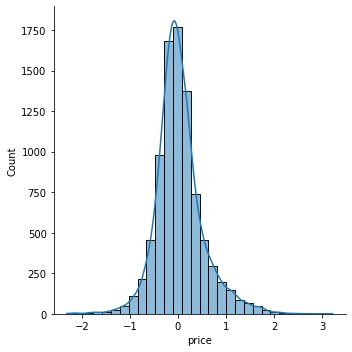

In [253]:
#Histogram difference between validation data and the one predicted by the SequentialFeatureSelection
sns.displot(y_test-model_test_preds, bins=30, kde=True)

In [254]:
best_estimator =model_grid.best_estimator_
best_selector =best_estimator.named_steps['selector']
best_model = model_grid.best_estimator_
feature_names =X_train.columns[best_selector.get_support()]
coefs=best_model['targetregressor'].regressor_.coef_

In [255]:
pd.DataFrame([coefs.T], columns = feature_names, index = ['targetregressor'])

,automatic,4wd,truck,hybrid,clean,6 cylinders,ford,honda,odometer,ny
targetregressor,0.087967,-0.034249,-0.071315,0.064882,0.027851,-0.063683,0.050721,0.02991,0.173222,-0.12828


### Method 3
Lasso as a estimator

In [256]:
selector_pipe_lasso = Pipeline([('transformer',ordinal_ohe_transformer),('scale', StandardScaler()),('targetregressor',TransformedTargetRegressor(func=np.log1p,inverse_func=np.expm1,regressor= Lasso(alpha=0.1)))])
selector_pipe_lasso

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(categories=[['salvage',
                                                                              'fair',
                                                                              'good',
                                                                              'excellent',
                                                                              'like '
                                                                              'new',
                                                                              'new']]),
                                                  ['condition'])])),
                ('scale', StandardScaler()),
                ('targetregressor',
                 TransformedTargetRegressor(func=<ufunc 'log1p'>,
                                            inverse_func=<ufunc 'expm1'>,
                                            regressor=Lasso(alpha=0.1)))])

In [257]:
model_param_dict={'targetregressor__regressor__alpha': [0.1, 1.0, 10.0, 100.0, 1000.0]}

In [258]:
cv = KFold(n_splits=5)
scores5 = cross_val_score(selector_pipe_lasso, X1,y,scoring='neg_mean_squared_error',cv=cv)

In [260]:
cv = KFold(n_splits=5)
scores6 = cross_val_score(selector_pipe_lasso, X1,y,scoring='r2',cv=cv)

In [261]:
print('K-Fold Cross Validation ‘neg_mean_squared_error scores: %s' % scores5)
print('K-Fold Cross Validation ‘neg_mean_squared_error: %.3f +/- %.3f' % (np.mean(scores5),np.std(scores5)))
print('K-Fold Cross Validation r^2 scores: %s' % scores6)
print('K-Fold Cross Validation R^2: %.3f +/- %.3f' % (np.mean(scores6),np.std(scores6)))

K-Fold Cross Validation ‘neg_mean_squared_error scores: [-0.61493401 -0.63745226 -0.75301512 -0.55894535 -0.73681075]
K-Fold Cross Validation ‘neg_mean_squared_error: -0.660 +/- 0.074
K-Fold Cross Validation r^2 scores: [0.42102268 0.41248584 0.37111384 0.43482115 0.38468345]
K-Fold Cross Validation R^2: 0.405 +/- 0.024


In [262]:
model_grid_lasso = GridSearchCV(selector_pipe_lasso, param_grid=model_param_dict)
model_grid_lasso.fit(X_train, y_train)
model_train_preds = model_grid_lasso.predict(X_train)
model_test_preds = model_grid_lasso.predict(X_test)
model_train_mse = mean_squared_error(y_train,model_train_preds)
model_test_mse = mean_squared_error(y_test, model_test_preds)
print(f'Lasso Train MSE: {model_train_mse}')
print(f'Lasso Test MSE: {model_test_mse}')
print(f'Lasso R^2 Score::{r2_score(y_true=y_test, y_pred=model_test_preds)}')

Lasso Train MSE: 0.6612654334272843
Lasso Test MSE: 0.6540655039406926
Lasso R^2 Score::0.41562942907062705


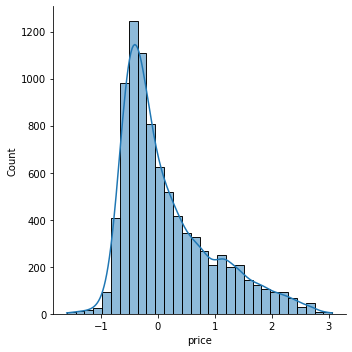

In [263]:
sns.displot(y_test-model_test_preds, bins=30, kde=True)

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

Ranking Regression Models built by comparing their metrics

In [265]:
mse_11 = pd.DataFrame([('Ridge', 0.1959),
                   ('SQ', 0.2405),
                   ('Lasso', 0.6612)],
           columns=('Model','MSE')
                 )

In [266]:
plotdata1 = pd.DataFrame(
    {"MSE": [0.1959, 0.2405, 0.6612]}, 
    index=["Ridge", "SQL", "Lasso"])

Text(0, 0.5, 'MSE Hold-Out Cross-Validation')

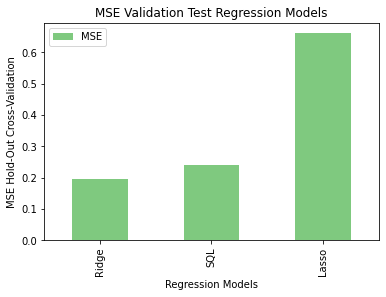

In [267]:
plotdata1.plot(kind="bar",stacked=True,colormap='Accent')
plt.title("MSE Validation Test Regression Models")
plt.xlabel("Regression Models")
plt.ylabel("MSE Hold-Out Cross-Validation")


In [269]:
plotdata2 = pd.DataFrame(
    {"MSE": [0.212, 0.253, 0.654]}, 
    index=["Ridge", "SQL", "Lasso"])

Text(0, 0.5, 'MSE K-Fold Cross-Validation')

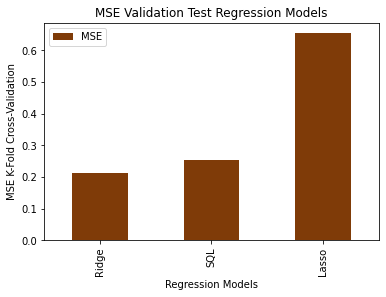

In [270]:
plotdata2.plot(kind="bar",stacked=True,colormap='PuOr')
plt.title("MSE Validation Test Regression Models")
plt.xlabel("Regression Models")
plt.ylabel("MSE K-Fold Cross-Validation")

In [271]:
plotdata3 = pd.DataFrame(
    {"R^2 Score": [0.8249, 0.7851, 0.4156]}, 
    index=["Ridge", "SQL", "Lasso"])

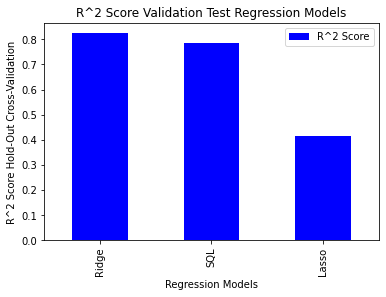

In [272]:
plotdata3.plot(kind="bar",stacked=True,colormap='winter')
plt.title("R^2 Score Validation Test Regression Models")
plt.xlabel("Regression Models")
plt.ylabel("R^2 Score Hold-Out Cross-Validation")
plt.legend(loc='upper right')


### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

### Observation

In [ ]:
Using the above model observation Ridge

Based on MSE and R^2 score of different regression model and Cross validation technique indicated
lowest MSE and Highest R^2 score are Ridge Regression mdel. It looked more reasonable. So 
Ridge Regression model were choosen as recommended model.

Recommendations to the car dealership

1. Total rows in data set were 426880 and target column was price
2. Data Clean up is done as there were lots of Nan values
3. Outliers were removed
4. Categorical features were applied since there are categorical features in dataset
5. Visualization of key features were included above
6. Ran with three regression model
    Ridge Regression
    Sequential/Regression
    Lasso
    It is observed Ridge regression model performed as top model in this datset with MSE 0.212 and R^2 0.82

7. Three most important feature customer value in cars are gas,diesel and automatic
